In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('medical_insurance.csv')
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [11]:
# Checking for missing values
print(data.isnull().sum())

# For categorical variables like 'smoker', 'region', etc., we might use one-hot encoding
data_processed = pd.get_dummies(data, columns=['smoker', 'region', 'sex'], drop_first=True)

# Example of normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_processed['age'] = scaler.fit_transform(data_processed[['age']])


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'charges' is the target variable and we already prepared your feature set 'X'
X = data_processed.drop('charges', axis=1)
y = data_processed['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, y_pred)}')


MSE: 39933194.54805148


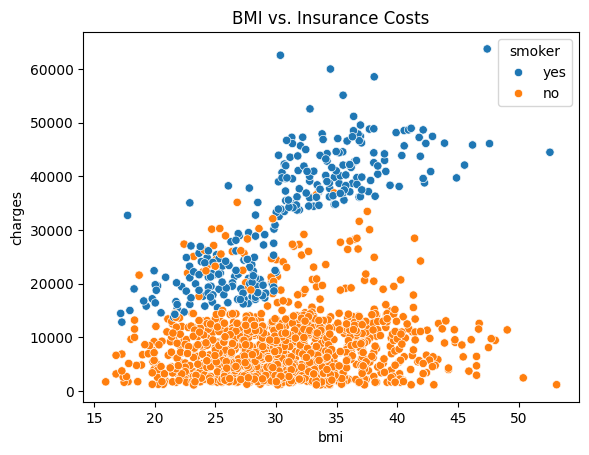

In [10]:
# Relationship between BMI and insurance costs
sns.scatterplot(x='bmi', y='charges', data=data, hue='smoker')
plt.title('BMI vs. Insurance Costs')
plt.show()

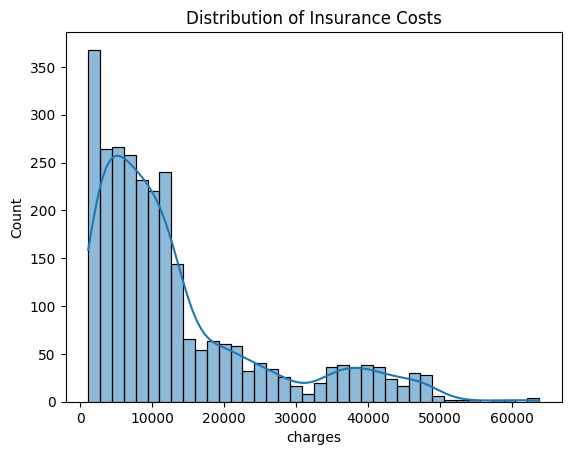

In [13]:

# Distribution of insurance costs
sns.histplot(data['charges'], kde=True)
plt.title('Distribution of Insurance Costs')
plt.show()

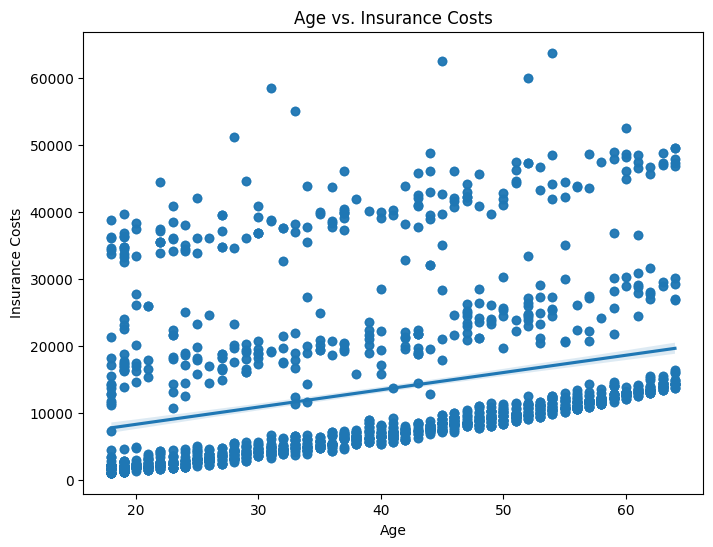

In [6]:
#Regression Plot of Age vs. Insurance Costs
plt.figure(figsize=(8, 6))
sns.regplot(x='age', y='charges', data=data)
plt.title('Age vs. Insurance Costs')
plt.xlabel('Age')
plt.ylabel('Insurance Costs')
plt.show()

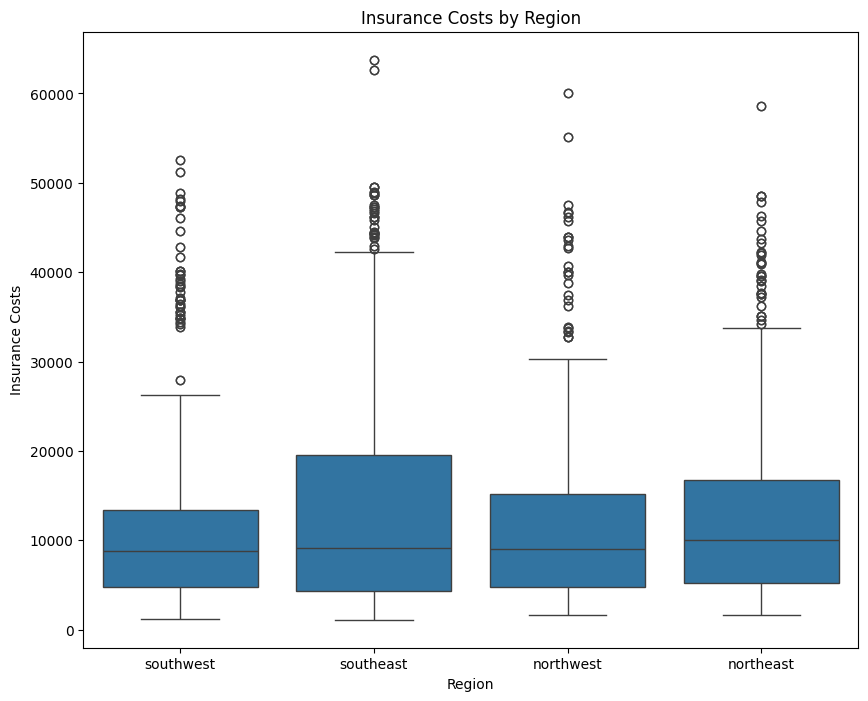

In [7]:
#Impact of Region on Insurance Costs
plt.figure(figsize=(10, 8))
sns.boxplot(x='region', y='charges', data=data)
plt.title('Insurance Costs by Region')
plt.xlabel('Region')
plt.ylabel('Insurance Costs')
plt.show()

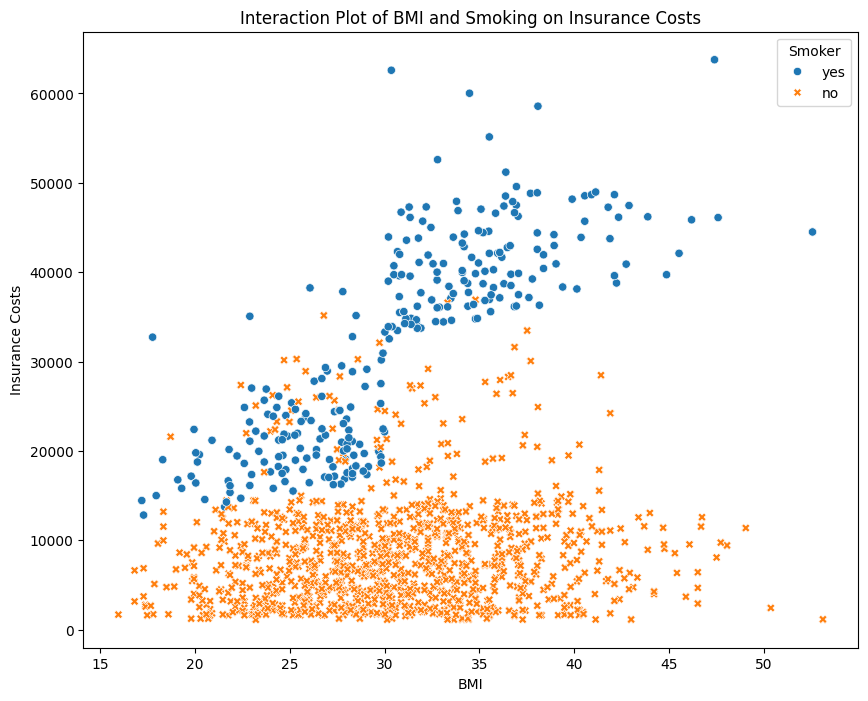

In [14]:
#Interaction Plot of BMI and Smoking on Insurance Costs
plt.figure(figsize=(10, 8))
sns.scatterplot(x='bmi', y='charges', data=data, hue='smoker', style='smoker')
plt.title('Interaction Plot of BMI and Smoking on Insurance Costs')
plt.xlabel('BMI')
plt.ylabel('Insurance Costs')
plt.legend(title='Smoker', loc='upper right')
plt.show()